In [ ]:
"""
Q1: Can we use Bagging for regression problems?
Answer: Yes, Bagging works for regression. It trains multiple regressors on bootstrapped samples and averages their predictions to reduce variance and improve stability.

=====================================================================================================================
Q2: What is the difference between multiple model training and single model training?
Answer:
- Single model training: Relies on one model, which may overfit or underfit.
- Multiple model training (ensemble): Combines several models to reduce bias and variance, improving generalization.

=====================================================================================================================
Q3: Explain the concept of feature randomness in Random Forest.
Answer: Random Forest introduces randomness by selecting a random subset of features at each split. This decorrelates trees, increases diversity, and enhances predictive performance.

=====================================================================================================================
Q4: What is OOB (Out-of-Bag) Score?
Answer: The OOB score is an internal validation metric. It uses data not included in the bootstrap sample to test accuracy, giving an unbiased estimate of model performance.

=====================================================================================================================
Q5: How can you measure the importance of features in a Random Forest model?
Answer:
- Mean decrease in impurity (Gini importance).
- Permutation importance (measuring prediction error increase when feature values are shuffled).

=====================================================================================================================
Q6: Explain the working principle of a Bagging Classifier.
Answer: A Bagging Classifier trains multiple base classifiers on bootstrapped samples and combines their predictions through majority voting, reducing variance and improving accuracy.

=====================================================================================================================
Q7: How do you evaluate a Bagging Classifier’s performance?
Answer: By using metrics like accuracy, precision, recall, F1-score, and OOB score. Cross-validation can also be applied for robust evaluation.

=====================================================================================================================
Q8: How does a Bagging Regressor work?
Answer: It trains multiple regressors on bootstrapped samples and averages their outputs. This reduces variance and improves prediction stability compared to a single regressor.

=====================================================================================================================
Q9: What is the main advantage of ensemble techniques?
Answer: They combine multiple models to achieve higher accuracy, robustness, and generalization compared to individual models.

=====================================================================================================================
Q10: What is the main challenge of ensemble methods?
Answer: They can be computationally expensive, harder to interpret, and may require more memory and training time.

=====================================================================================================================
Q11: Explain the key idea behind ensemble techniques.
Answer: The key idea is to combine multiple weak or strong learners to create a more powerful model that reduces bias, variance, or both.

=====================================================================================================================
Q12: What is a Random Forest Classifier?
Answer: It is an ensemble of decision trees trained on bootstrapped samples with feature randomness, combining predictions via majority voting for classification tasks.

=====================================================================================================================
Q13: What are the main types of ensemble techniques?
Answer:
- Bagging (Bootstrap Aggregating).
- Boosting (e.g., AdaBoost, Gradient Boosting).
- Stacking (meta-learning).

=====================================================================================================================
Q14: What is ensemble learning in machine learning?
Answer: Ensemble learning is the process of combining multiple models to improve predictive performance, robustness, and generalization.

=====================================================================================================================
Q15: When should we avoid using ensemble methods?
Answer: Avoid when:
- Data is small and simple (single model suffices).
- Interpretability is crucial.
- Computational resources are limited.

=====================================================================================================================
Q16: How does Bagging help in reducing overfitting?
Answer: Bagging reduces overfitting by averaging predictions from multiple models trained on different bootstrapped samples, lowering variance.

=====================================================================================================================
Q17: Why is Random Forest better than a single Decision Tree?
Answer: Random Forest reduces overfitting, improves accuracy, and provides more stable predictions by combining multiple decorrelated trees.

=====================================================================================================================
Q18: What is the role of bootstrap sampling in Bagging?
Answer: Bootstrap sampling creates diverse training sets by sampling with replacement, ensuring model diversity and reducing variance.

=====================================================================================================================
Q19: What are some real-world applications of ensemble techniques?
Answer:
- Fraud detection in banking.
- Spam filtering in emails.
- Medical diagnosis.
- Stock market prediction.
- Recommendation systems.

=====================================================================================================================
Q20: What is the difference between Bagging and Boosting?
Answer:
- Bagging: Builds models independently on bootstrapped samples and aggregates results (reduces variance).
- Boosting: Builds models sequentially, each correcting errors of the previous one (reduces bias).
"""


# PRACTICALS

In [8]:
#Q21: Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

#====================================================================================================================

#Q22: Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
#Answer:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

#=====================================================================================================================
#Q23: Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
#Answer:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_
for name, score in zip(load_breast_cancer().feature_names, importances):
    print(f"{name}: {score:.4f}")

#=====================================================================================================================
#Q24: Train a Random Forest Regressor and compare its performance with a single Decision Tree
#Answer:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

#=====================================================================================================================
#Q25: Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
#Answer:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf.fit(X, y)

print("OOB Score:", rf_clf.oob_score_)

#=====================================================================================================================
#Q26: Train a Bagging Classifier using SVM as a base estimator and print accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=20, random_state=42)
bag_svm.fit(X_train, y_train)

y_pred = bag_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



#=====================================================================================================================
#Q27: Train a Random Forest Classifier with different numbers of trees and compare accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    print(f"Trees: {n}, Accuracy: {accuracy_score(y_test, y_pred)}")


#=====================================================================================================================
#Q28: Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
#Answer:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=20, random_state=42)
bag_lr.fit(X_train, y_train)

y_pred_prob = bag_lr.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, y_pred_prob))


#=====================================================================================================================
#Q29: Train a Random Forest Regressor and analyze feature importance scores
#Answer:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

X, y = load_diabetes(return_X_y=True)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

importances = rf_reg.feature_importances_
for name, score in zip(load_diabetes().feature_names, importances):
    print(f"{name}: {score:.4f}")


#=====================================================================================================================
#Q30: Train an ensemble model using both Bagging and Random Forest and compare accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

bag_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

bag_pred = bag_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))




Accuracy: 1.0
MSE: 2987.0073593984966
mean radius: 0.0348
mean texture: 0.0152
mean perimeter: 0.0680
mean area: 0.0605
mean smoothness: 0.0080
mean compactness: 0.0116
mean concavity: 0.0669
mean concave points: 0.1070
mean symmetry: 0.0034
mean fractal dimension: 0.0026
radius error: 0.0143
texture error: 0.0037
perimeter error: 0.0101
area error: 0.0296
smoothness error: 0.0047
compactness error: 0.0056
concavity error: 0.0058
concave points error: 0.0038
symmetry error: 0.0035
fractal dimension error: 0.0059
worst radius: 0.0828
worst texture: 0.0175
worst perimeter: 0.0808
worst area: 0.1394
worst smoothness: 0.0122
worst compactness: 0.0199
worst concavity: 0.0373
worst concave points: 0.1322
worst symmetry: 0.0082
worst fractal dimension: 0.0045
Random Forest MSE: 2859.641982706767
Decision Tree MSE: 5697.789473684211
OOB Score: 0.9533333333333334
Accuracy: 1.0
Trees: 10, Accuracy: 1.0
Trees: 50, Accuracy: 1.0
Trees: 100, Accuracy: 1.0
Trees: 200, Accuracy: 1.0


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

AUC Score: 0.9979423868312758
age: 0.0575
sex: 0.0119
bmi: 0.2762
bp: 0.0871
s1: 0.0473
s2: 0.0554
s3: 0.0512
s4: 0.0271
s5: 0.3156
s6: 0.0708
Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.9523809523809524
Estimators: 10, MSE: 3237.526541353384
Estimators: 50, MSE: 2987.0073593984966
Estimators: 100, MSE: 2908.80615037594
Misclassified samples: []
Decision Tree Accuracy: 1.0
Bagging Accuracy: 1.0


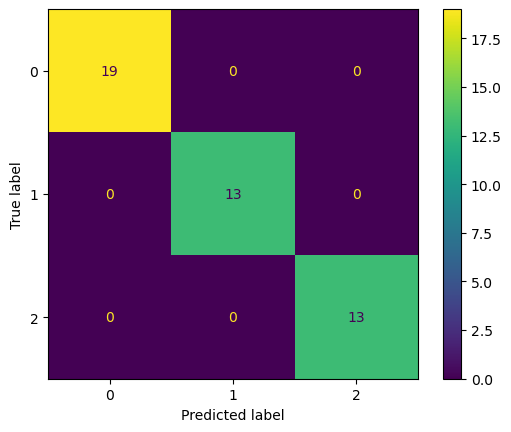

Stacking Accuracy: 1.0
worst area: 0.1394
worst concave points: 0.1322
mean concave points: 0.1070
worst radius: 0.0828
worst perimeter: 0.0808
Precision: 0.963302752293578
Recall: 0.9722222222222222
F1-score: 0.967741935483871
Max Depth: None, Accuracy: 1.0
Max Depth: 5, Accuracy: 1.0
Max Depth: 10, Accuracy: 1.0
Base Estimator: DecisionTreeRegressor, MSE: 2987.0073593984966
Base Estimator: KNeighborsRegressor, MSE: 3140.186131007519


In [11]:
#Q31: Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

#=====================================================================================================================

#Q32: Train a Bagging Regressor with different numbers of base estimators and compare performance
#Answer:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in [10, 50, 100]:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Estimators: {n}, MSE: {mean_squared_error(y_test, y_pred)}")

#=====================================================================================================================

#Q33: Train a Random Forest Classifier and analyze misclassified samples
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

misclassified = [(i, y_test[i], y_pred[i]) for i in range(len(y_test)) if y_test[i] != y_pred[i]]
print("Misclassified samples:", misclassified)

#=====================================================================================================================

#Q34: Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

dt_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_clf.predict(X_test)))
print("Bagging Accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))

#=====================================================================================================================

#Q35: Train a Random Forest Classifier and visualize the confusion matrix
#Answer:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#=====================================================================================================================


#Q36: Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
stack_clf.fit(X_train, y_train)

print("Stacking Accuracy:", accuracy_score(y_test, stack_clf.predict(X_test)))

#=====================================================================================================================

#Q37: Train a Random Forest Classifier and print the top 5 most important features
#Answer:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_
indices = importances.argsort()[-5:][::-1]

for i in indices:
    print(f"{load_breast_cancer().feature_names[i]}: {importances[i]:.4f}")


#=====================================================================================================================

#Q38: Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
#Answer:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

#=====================================================================================================================


#Q39: Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
#Answer:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [None, 5, 10]:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    print(f"Max Depth: {depth}, Accuracy: {accuracy_score(y_test, rf_clf.predict(X_test))}")



#Q40: Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
#Answer:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [DecisionTreeRegressor(), KNeighborsRegressor()]
for est in estimators:
    bag_reg = BaggingRegressor(estimator=est, n_estimators=50, random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Base Estimator: {est.__class__.__name__}, MSE: {mean_squared_error(y_test, y_pred)}")




